In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/google_cleaned.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [ ]:
df.isnull().sum().sum()

3180

In [ ]:
df.isnull().sum().sort_values(ascending = False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
day                  0
month                0
year                 0
dtype: int64

In [ ]:
df.shape

(10840, 16)

In [ ]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(10357, 16)

In [ ]:
df_copy = df.copy()

In [ ]:
cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()*100]
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [ ]:
for var  in df_copy.columns:
    print(var)

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
day
month
year


In [ ]:
df_copy['Rating'].isnull().mean()*100

14.145022689968137

In [ ]:
for var  in df_copy.columns:
    print(var)
    df_copy[var].isnull().mean()*100

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
day
month
year


In [ ]:
df_copy[cols]

,Rating,Size,Type,Current Ver,Android Ver
0,4.1,19.0,Free,1.0.0,4.0.3 and up
1,3.9,14.0,Free,2.0.0,4.0.3 and up
2,4.7,8.7,Free,1.2.4,4.0.3 and up
3,4.5,25.0,Free,Varies with device,4.2 and up
4,4.3,2.8,Free,1.1,4.4 and up
...,...,...,...,...,...
10835,4.5,53.0,Free,1.48,4.1 and up
10836,5.0,3.6,Free,1.0,4.1 and up
10837,NaN,9.5,Free,1.0,2.2 and up
10838,4.5,NaN,Free,Varies with device,Varies with device


In [ ]:
drop_df = df_copy[cols].dropna()

In [ ]:
df_copy.shape

(10357, 16)

In [ ]:
drop_df.shape

(7418, 5)

In [ ]:
drop_df["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10832    4.8
10833    4.0
10835    4.5
10836    5.0
10839    4.5
Name: Rating, Length: 7418, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

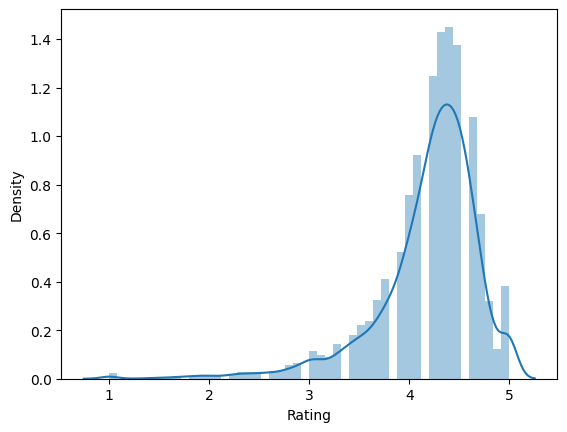

In [ ]:
sns.distplot(df_copy["Rating"])

<Axes: xlabel='Rating', ylabel='Density'>

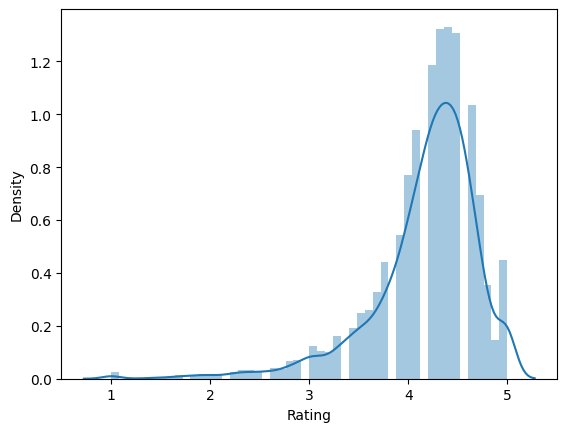

In [ ]:
sns.distplot(drop_df["Rating"])

In [ ]:
#Mean, Median, Mode for Handling Missing Value.
df_copy_me_mo = df.copy()
df_copy_me_mo['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838     NaN
10839    19.0
Name: Size, Length: 10357, dtype: float64

In [ ]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10835    53.000000
10836     3.600000
10837     9.500000
10838    21.277437
10839    19.000000
Name: Size, Length: 10357, dtype: float64

In [ ]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10835    53.0
10836     3.6
10837     9.5
10838    13.0
10839    19.0
Name: Size, Length: 10357, dtype: float64

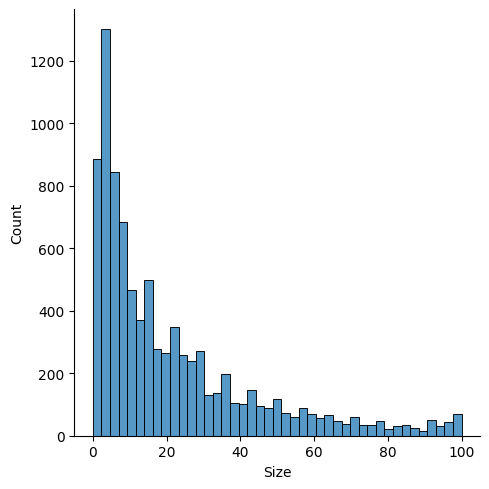

In [ ]:
sns.displot(df['Size'])

In [ ]:
df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean())

0        19.000000
1        14.000000
2         8.700000
3        25.000000
4         2.800000
           ...    
10835    53.000000
10836     3.600000
10837     9.500000
10838    21.277437
10839    19.000000
Name: Size, Length: 10357, dtype: float64

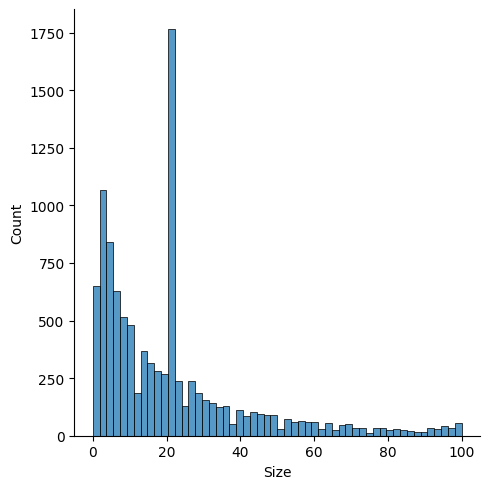

In [ ]:
sns.displot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean()))

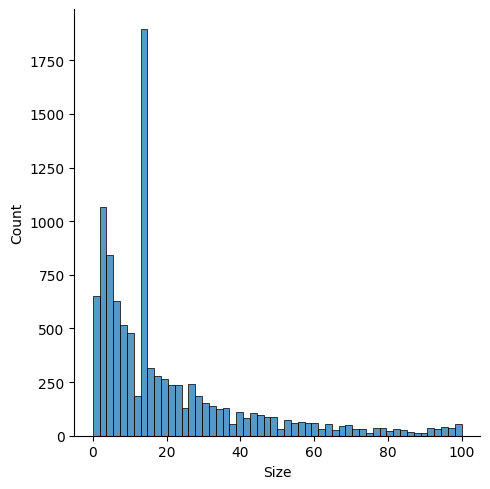

In [ ]:
sns.displot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median()))

<Axes: xlabel='Size', ylabel='Density'>

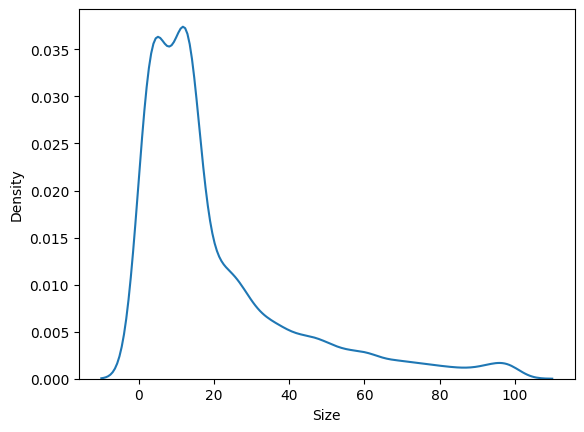

In [ ]:
sns.kdeplot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median()))

In [ ]:
numeric_features  = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [ ]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

In [ ]:
num_df = df[numeric_features ]

In [ ]:
num_df

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


In [ ]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
cat_df= df[categorical_features]

In [ ]:
cat_df

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
df["App"].value_counts()

App
ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: count, Length: 9659, dtype: int64

In [ ]:
len(df["App"].value_counts())

9659

In [ ]:
df["App"].value_counts(normalize = True)*100   ## To Check count value in Percentages we use Normalize ().

App
ROBLOX                                           0.086898
8 Ball Pool                                      0.067587
Bubble Shooter                                   0.057932
Helix Jump                                       0.057932
Zombie Catchers                                  0.057932
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.009655
PixelLab - Text on pictures                      0.009655
P Launcher for Android™ 9.0                      0.009655
Pacify (Android P theme) - Theme for Xperia™     0.009655
iHoroscope - 2018 Daily Horoscope & Astrology    0.009655
Name: proportion, Length: 9659, dtype: float64

In [ ]:
## Check the Distribution of the Numeric Data
df[numeric_features]

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


<Axes: xlabel='Rating', ylabel='Density'>

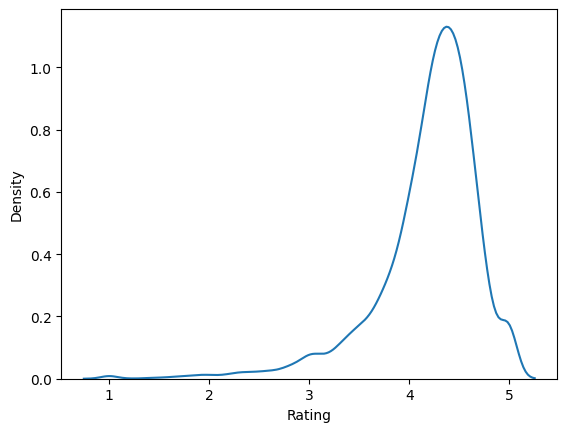

In [ ]:
## Check the Distribution of the Numeric Variables.
sns.kdeplot(num_df["Rating"])

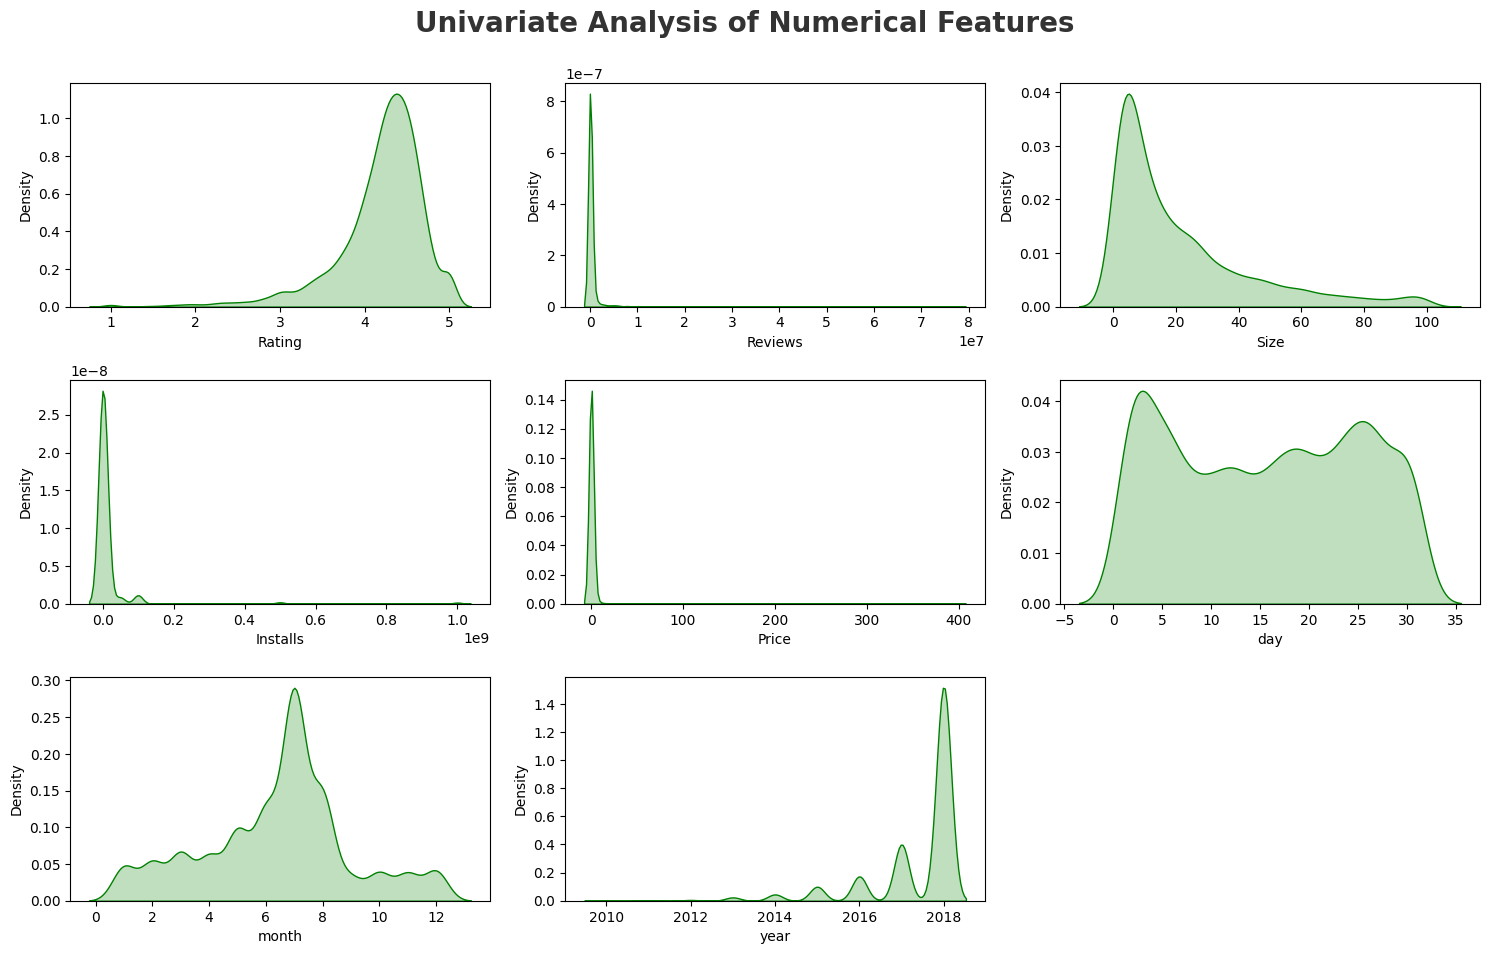

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='g')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


In [ ]:
cat_df

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
## categorical_features

cat_df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

In [ ]:
cat_df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Content Rating'>

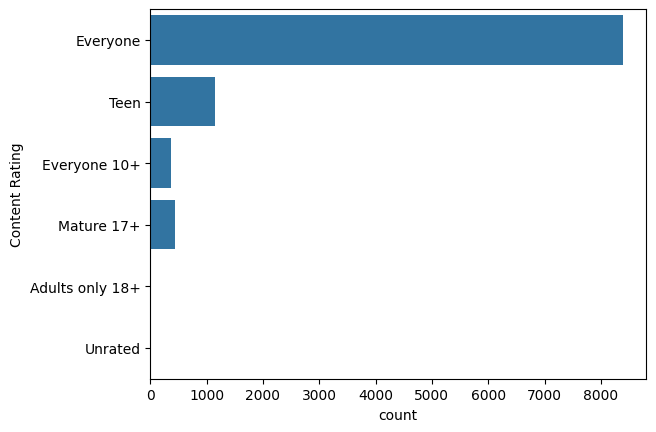

In [ ]:
sns.countplot(cat_df['Content Rating'])

<Axes: xlabel='count', ylabel='Type'>

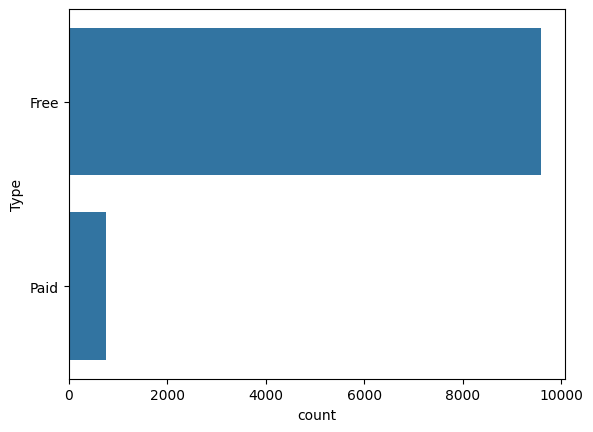

In [ ]:
sns.countplot(cat_df['Type'])

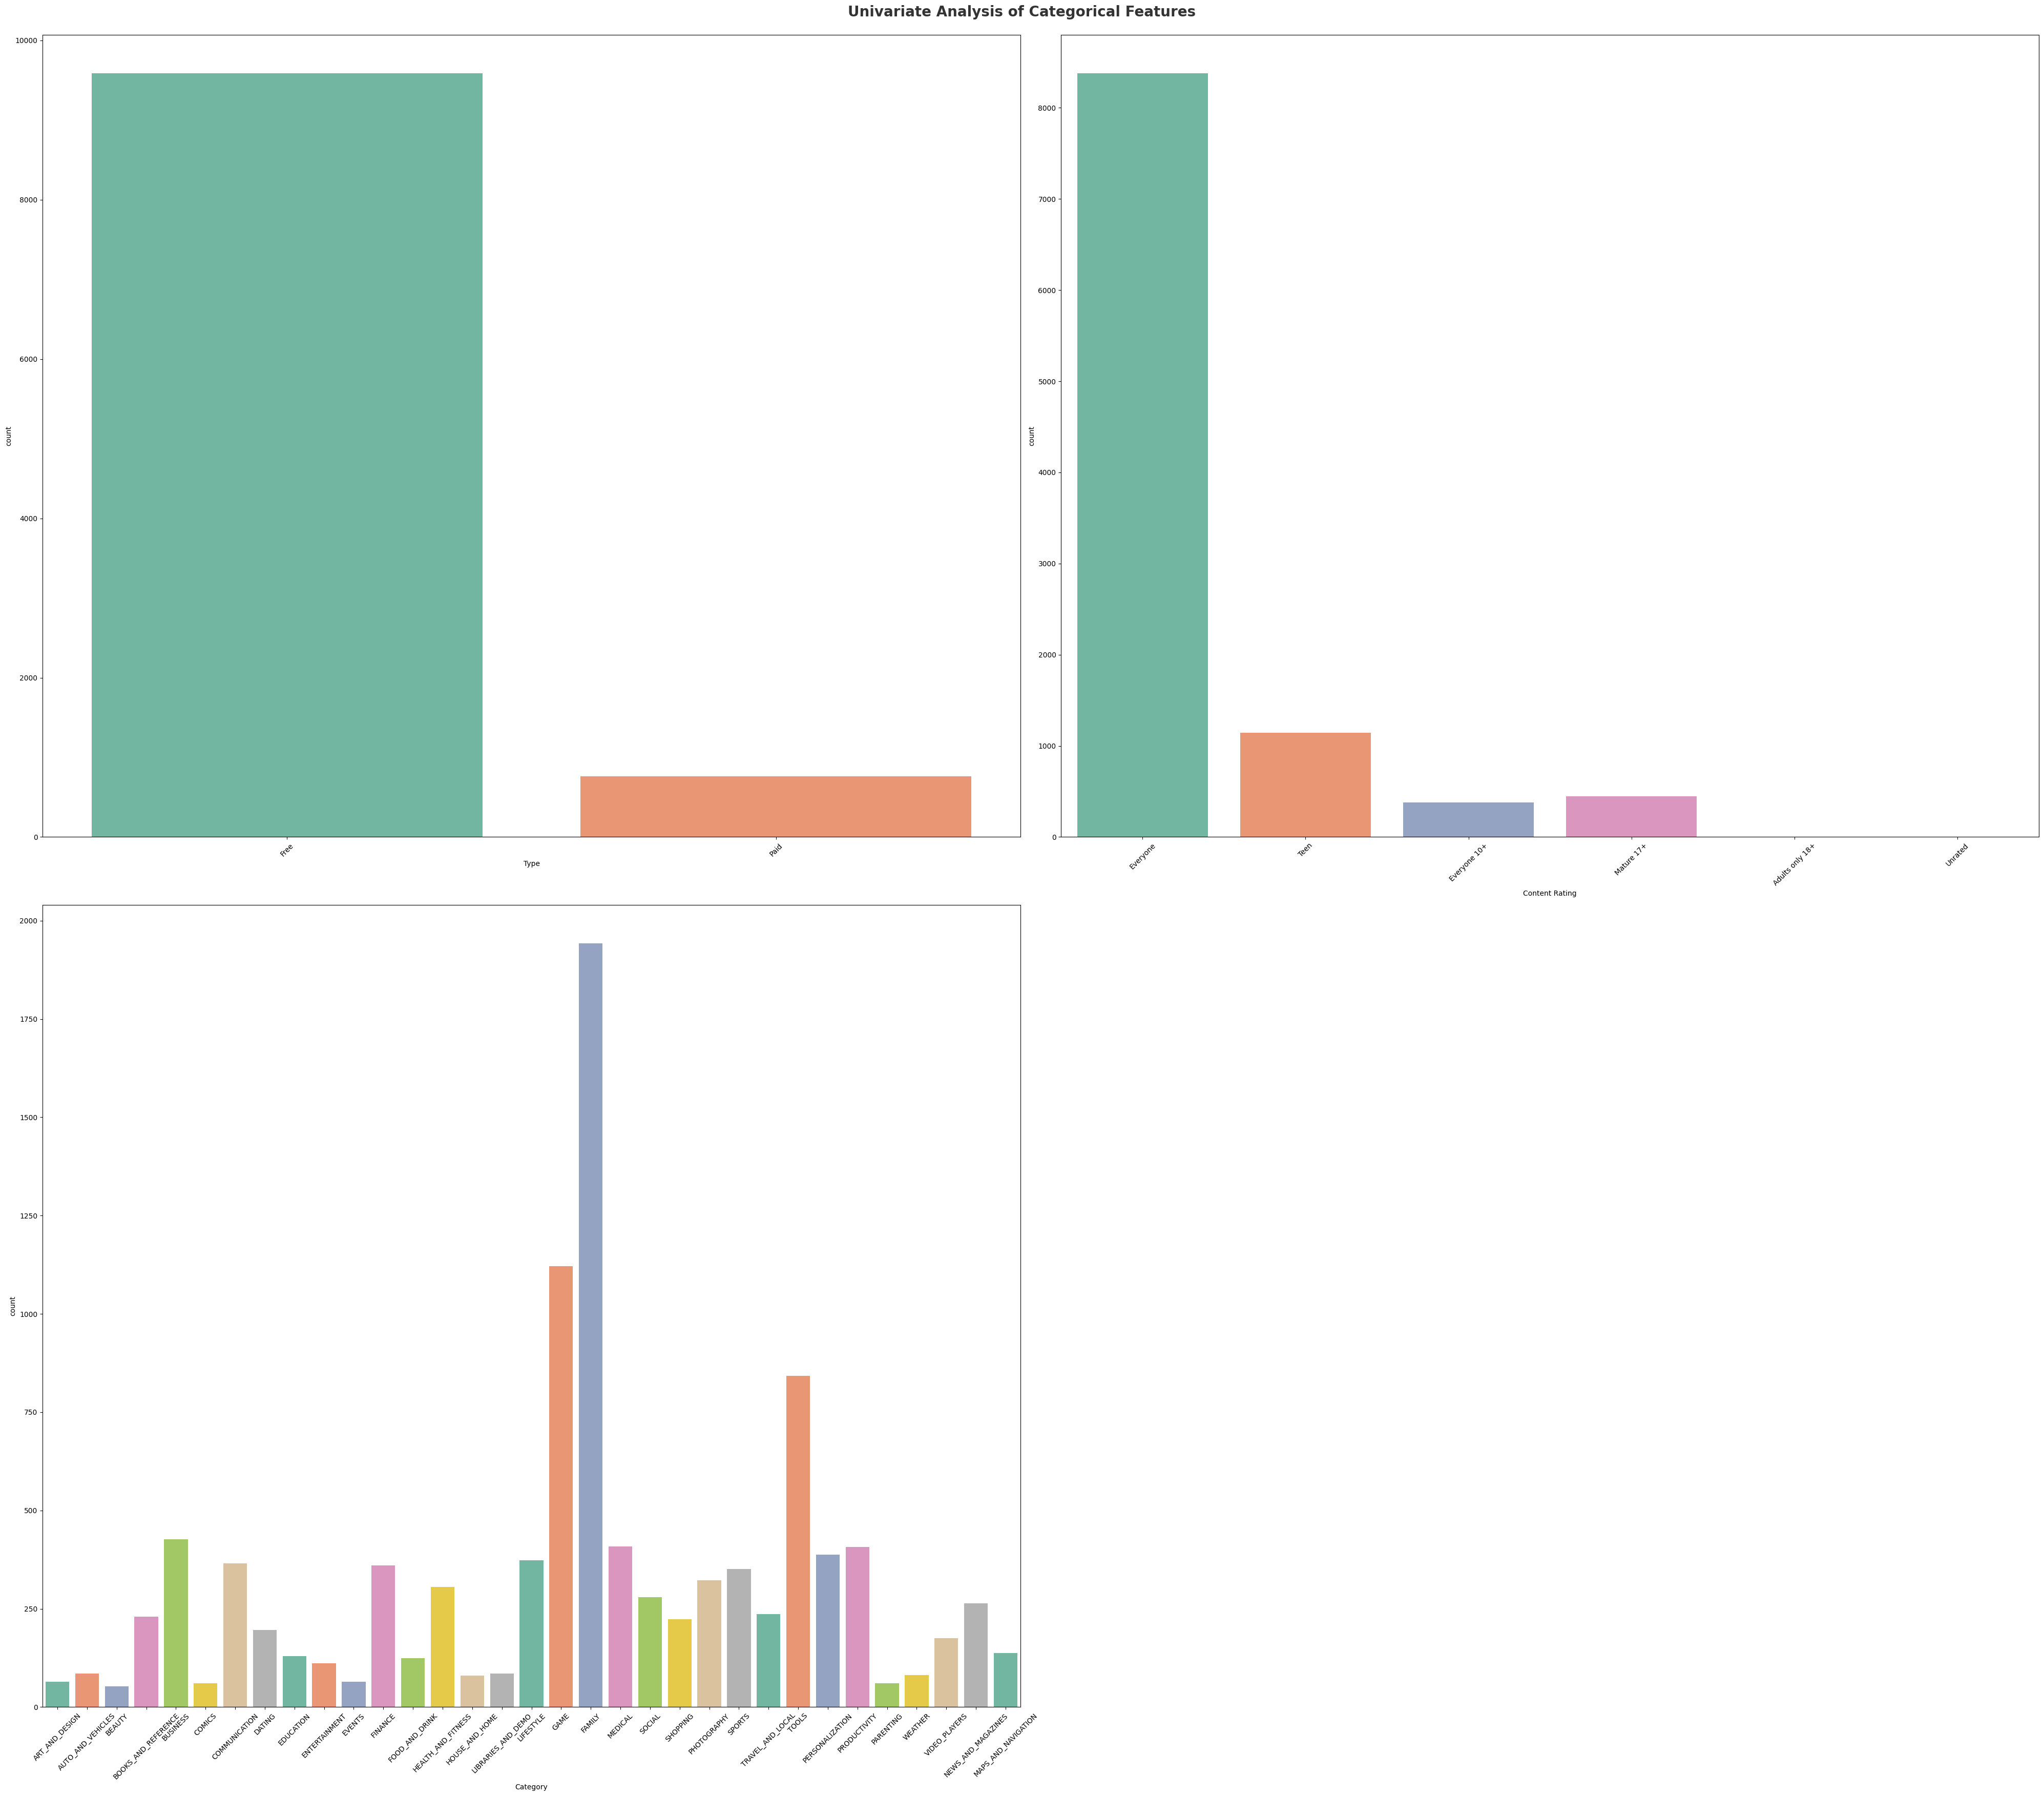

In [ ]:
# categorical columns
plt.figure(figsize=(40, 35))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating','Category']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


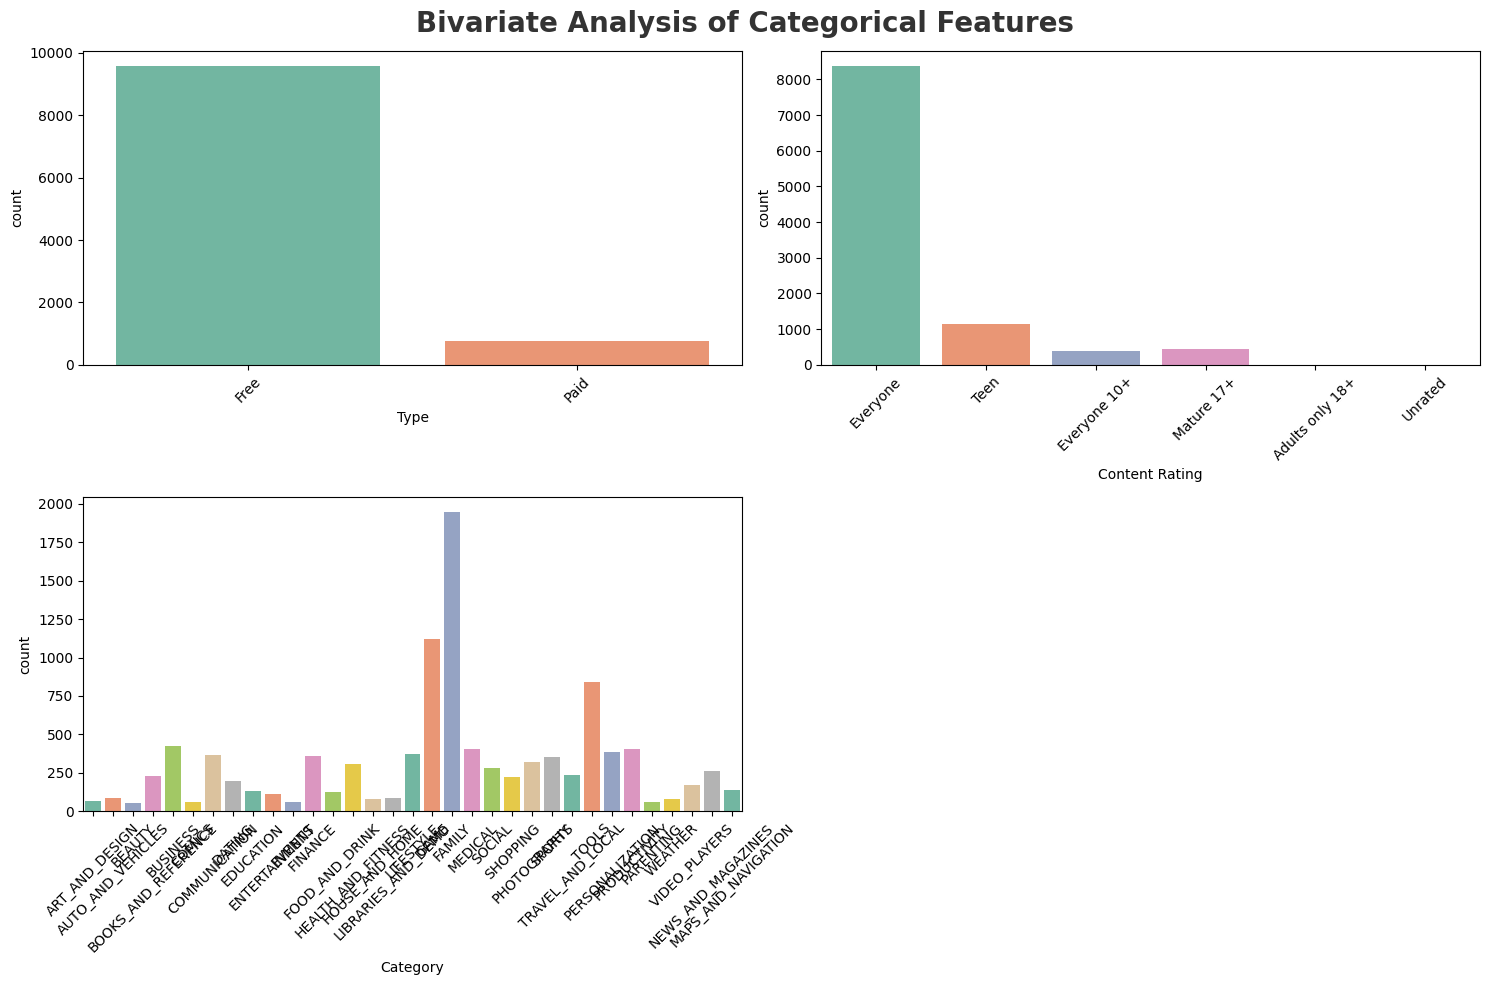

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

category = ['Type', 'Content Rating', 'Category']
plt.figure(figsize=(15, 10))
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8)

for i, cat in enumerate(category):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat], palette="Set2")
    plt.xlabel(cat)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [ ]:
df.corr()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'